# How to use the Sharpe ratio for risk-adjusted returns

In [1]:
# Step 1: Get the data

# Start by importing the libraries and getting the data. I like to use yfinance for getting stock data and NumPy for vectorizing outputs.

import yfinance as yf
import numpy as np

In [2]:
data = yf.download(["SPY", "AAPL"], start="2020-01-01", end="2022-07-31")


[*********************100%***********************]  2 of 2 completed


In [3]:
closes = data['Adj Close']
spy_returns = closes.SPY.pct_change().dropna()
aapl_returns = closes.AAPL.pct_change().dropna()

In [4]:
# Step 2: Compute the Sharpe Ratio

# Creating a function for the Sharpe Ratio in Python is straightforward.

def sharpe_ratio(returns, adjustment_factor=0.0):
    """
    Determines the Sharpe ratio of a strategy.
    
    Parameters
    ----------
    returns : pd.Series or np.ndarray
        Daily returns of the strategy, noncumulative.
    adjustment_factor : int, float
        Constant daily benchmark return throughout the period.

    Returns
    -------
    sharpe_ratio : float

    Note
    -----
    See https://en.wikipedia.org/wiki/Sharpe_ratio for more details.
    """
    returns_risk_adj = returns - adjustment_factor
    return (
        returns_risk_adj.mean() / returns_risk_adj.std()
    ) * np.sqrt(252)

In [5]:
# Step 3: Compare investment options

# Compute the Sharpe Ratio for AAPL and SPY.

# sharpe ratio for SPY
sharpe_ratio(spy_returns)

# sharpe ratio for AAPL
sharpe_ratio(aapl_returns)

1.0165005422744007

<AxesSubplot:xlabel='Date'>

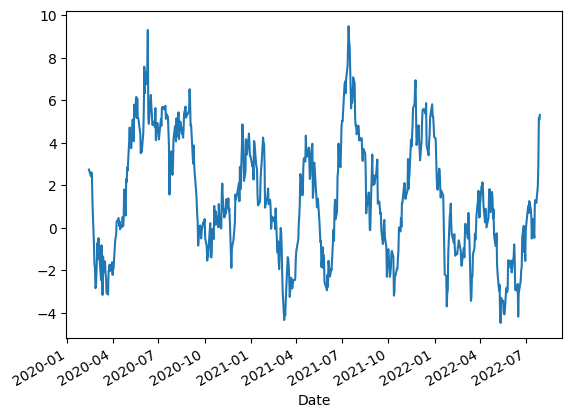

In [6]:
aapl_returns.rolling(30).apply(sharpe_ratio).plot()

<AxesSubplot:>

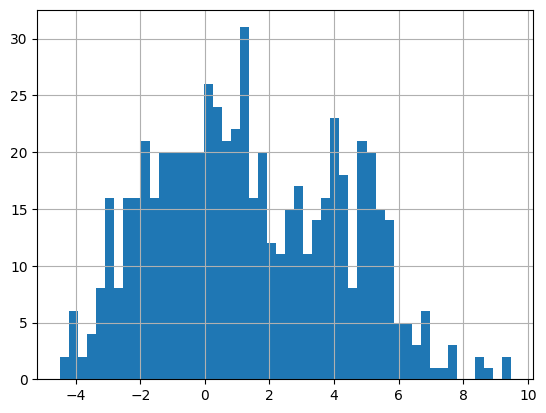

In [7]:
aapl_returns.rolling(30).apply(sharpe_ratio).hist(bins=50)

<AxesSubplot:>

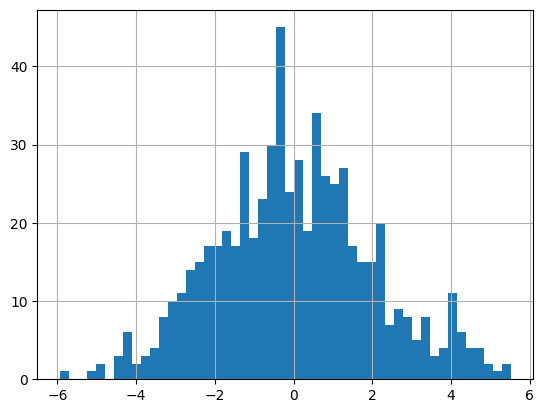

In [8]:
(
    aapl_returns.rolling(30).apply(sharpe_ratio)
    - spy_returns.rolling(30).apply(sharpe_ratio)
).hist(bins=50)